# Big Mart Sales Prediction 

In [62]:
#import libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

#visulaization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sckit libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

#warnings to avoid errors
import warnings
warnings.filterwarnings('ignore')

In [63]:
# read csv from computer

bigMart_path = "C:/Users/mythr/Downloads/"
train = pd.read_csv(bigMart_path+'train_bigMart.csv')
test = pd.read_csv(bigMart_path+'test_bigMart.csv')


In [64]:
# get number of rows and columns in train, test

print (train.shape)
print (test.shape)


(8523, 12)
(5681, 11)


In [65]:
#view first 10 rows of data in train

train.head(10)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [66]:
##view first 10 rows of data in test

test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [67]:
# create a new column in each of the files to indicate the source file 

train['sourceFile']='train'
test['sourceFile']='test'

In [68]:
# consolidate train and test files:
dataConsolidated=pd.concat([train,test],ignore_index=True)

In [69]:
 #get rows and columns in consolidated file
print (dataConsolidated.shape)
    


(14204, 13)


In [70]:
#get first 10 rows of data in consolidated file

print(dataConsolidated.head(10))

  Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0          Low Fat           FDA15  249.8092          3735.1380   
1          Regular           DRC01   48.2692           443.4228   
2          Low Fat           FDN15  141.6180          2097.2700   
3          Regular           FDX07  182.0950           732.3800   
4          Low Fat           NCD19   53.8614           994.7052   
5          Regular           FDP36   51.4008           556.6088   
6          Regular           FDO10   57.6588           343.5528   
7          Low Fat           FDP10  107.7622          4022.7636   
8          Regular           FDH17   96.9726          1076.5986   
9          Regular           FDU28  187.8214          4710.5350   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047        9.300   
1            Soft Drinks         0.019278        5.920   
2                   Meat         0.016760       17.500   
3  Fruits and Vegetables      

In [71]:
#check for missing values and get their count 
#item_outlet_sales is not present in test file(target variable)

dataConsolidated.isnull().sum()


Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
sourceFile                      0
dtype: int64

In [72]:
#get summary statistics of the whole data

dataConsolidated.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [73]:
#get the number of unique items in each column

dataConsolidated.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
sourceFile                       2
dtype: int64

In [74]:
#Filter qualitative(categorical) variables to get frequency of each type in the column
qualitative_columns=[x for x in dataConsolidated.dtypes.index if dataConsolidated.dtypes[x]== 'object']
qualitative_columns=[x for x in qualitative_columns if x not in ['Item_Identifier','Outlet_Identifier','sourceFile']]

for c in qualitative_columns:
    print ("\nFrequency for each of the categories in the datset is %s"%c)
    print (dataConsolidated[c].value_counts())


Frequency for each of the categories in the datset is Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency for each of the categories in the datset is Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency for each of the categories in the datset is Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency for each of the categories in the datset is Outlet_Size
Medium 

In [75]:
#getting average weight for each of the products



 

item_avg_wt=dataConsolidated.pivot_table(values='Item_Weight',index='Item_Identifier')

print (item_avg_wt)



missingValues_bool=dataConsolidated['Item_Weight'].isnull()
print (missingValues_bool)



dataConsolidated.loc[missingValues_bool,'Item_Weight']=dataConsolidated.loc[missingValues_bool,'Item_Identifier'].apply(lambda x : item_avg_wt.loc[x])
print (sum(dataConsolidated["Item_Weight"].isnull()))




                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [76]:
#impute values with zero
visibility_avg=dataConsolidated.pivot_table(values='Item_Visibility',index='Item_Identifier')
missingValues_bool=(dataConsolidated['Item_Visibility']==0)
print ('Number of zeros initially %d'%sum(missingValues_bool))
dataConsolidated.loc[missingValues_bool,'Item_Visibility']=dataConsolidated.loc[missingValues_bool,"Item_Identifier"].apply(lambda x:visibility_avg.loc[x])
print ('Number of zeros after imputing %d'%sum(dataConsolidated['Item_Visibility']==0))

Number of zeros initially 879
Number of zeros after imputing 0


In [77]:
# get 
dataConsolidated['Item_Visibility_MeanRatio']=dataConsolidated.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']],axis=1)
print (dataConsolidated['Item_Visibility_MeanRatio'].describe())



count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [78]:
#separating the data by capturing the first two characters of the string and maping them to categories
dataConsolidated['Item_Type_Combined']=dataConsolidated['Item_Identifier'].apply(lambda x:x[0:2])

dataConsolidated['Item_Type_Combined']=dataConsolidated['Item_Type_Combined'].map({'FD':'Food',
                                                            'NC':'Non-Consumable',
                                                            'DR':'Drinks'})

dataConsolidated['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [79]:
#getting data for all the years before 2013
dataConsolidated['Outlet_Years']=2013-dataConsolidated['Outlet_Establishment_Year']
dataConsolidated['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [80]:
#printing the types in FatContent column exactly the way they are present 
print ('Original categories from the column :')
print (dataConsolidated['Item_Fat_Content'].value_counts())

Original categories from the column :
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [81]:
#combining same type(like low fat)with different names into one and getting their count

print ('\nCategories after pulling them together(modified categories):')
dataConsolidated['Item_Fat_Content']=dataConsolidated['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                          'reg':'Regular',
                                                          'low fat':'Low Fat'})
dataConsolidated['Item_Fat_Content'].value_counts()


Categories after pulling them together(modified categories):


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [82]:
#Mark non-consumables as separate category in low_fat
dataConsolidated.loc[dataConsolidated['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
dataConsolidated['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [83]:

#changing outlet identifier to numeric, using label encoder
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

#Under lowfat mark non-edible items
dataConsolidated.loc[dataConsolidated['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
dataConsolidated['Item_Fat_Content'].value_counts()


le=LabelEncoder()

dataConsolidated['Outlet']=le.fit_transform(dataConsolidated['Outlet_Identifier'])
dataConsolidated['Item_Fat_Content'] = le.fit_transform(dataConsolidated['Item_Fat_Content'].astype(str))

dataConsolidated['Outlet_Location_Type'] = le.fit_transform(dataConsolidated['Outlet_Location_Type'].astype(str))
dataConsolidated['Outlet_Size'] = le.fit_transform(dataConsolidated['Outlet_Size'].astype(str))
dataConsolidated['Item_Type_Combined'] = le.fit_transform(dataConsolidated['Item_Type_Combined'].astype(str))
dataConsolidated['Outlet_Type'] = le.fit_transform(dataConsolidated['Outlet_Type'].astype(str))
dataConsolidated['Outlet'] = le.fit_transform(dataConsolidated['Outlet'].astype(str))
    
dataConsolidated.dtypes 
dataConsolidated=pd.get_dummies(dataConsolidated,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'])

print(" data types ",dataConsolidated.dtypes)

 data types  Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
sourceFile                    object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2            

# Visualization

In [84]:
# Identifying unique stores 
dataConsolidated.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [85]:
#assigning new variables for unique stores Identified
dataConsolidated_OUT049 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT049']
dataConsolidated_OUT018 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT018']
dataConsolidated_OUT010 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT010']
dataConsolidated_OUT013 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT013']
dataConsolidated_OUT027 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT027']
dataConsolidated_OUT045 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT045']
dataConsolidated_OUT017 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT017']
dataConsolidated_OUT035 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT035']
dataConsolidated_OUT019 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT019']
dataConsolidated_OUT046 = dataConsolidated[dataConsolidated.Outlet_Identifier == 'OUT046']

# Correlation between item type and sales for individual outlets

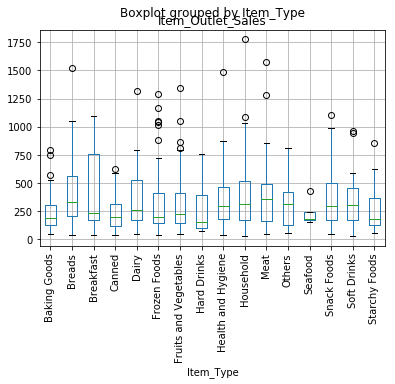

In [86]:
#Outlet 10
dataConsolidated_OUT010.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

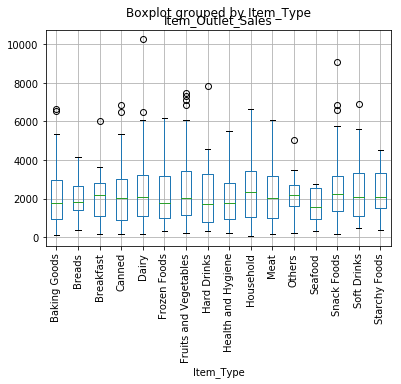

In [87]:
#Outlet 13
dataConsolidated_OUT013.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

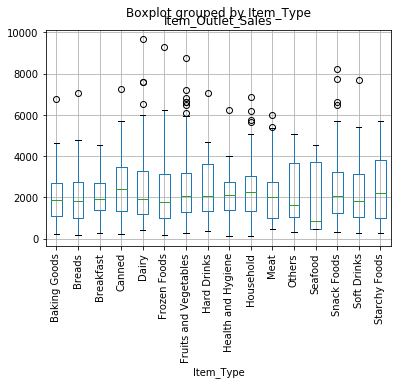

In [88]:
# outlet 17
dataConsolidated_OUT017.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

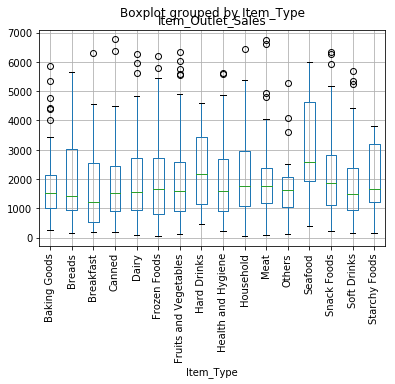

In [89]:
# outlet 18
dataConsolidated_OUT018.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

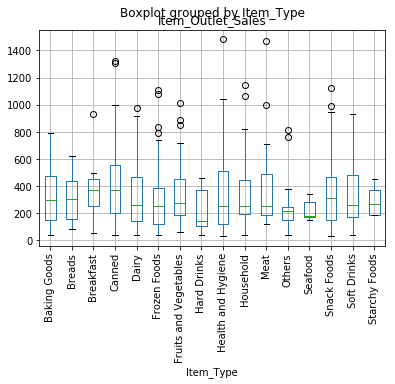

In [90]:
# outlet 19
dataConsolidated_OUT019.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

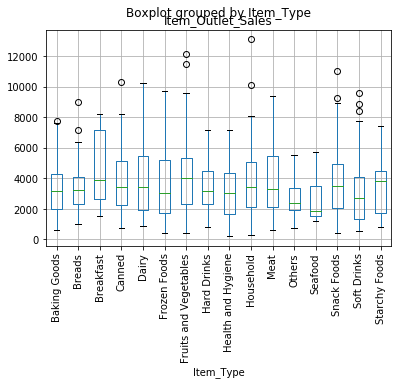

In [91]:
# outlet 27
dataConsolidated_OUT027.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

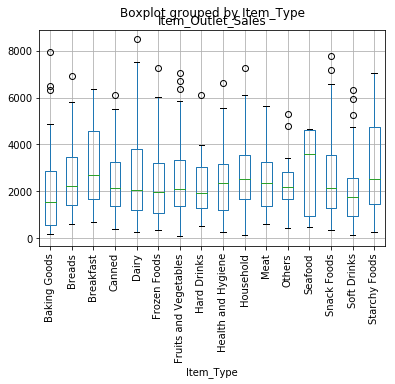

In [92]:
# outlet 35
dataConsolidated_OUT035.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

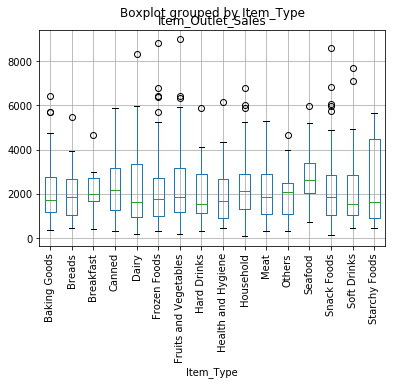

In [93]:
# outlet 45
dataConsolidated_OUT045.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text xticklabel objects>)

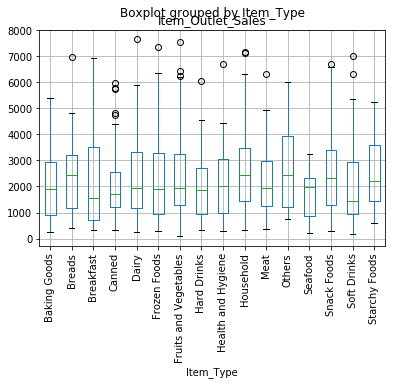

In [94]:
# outlet 49
dataConsolidated_OUT049.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90)

# Analysis of Item Visbility with outlet sales

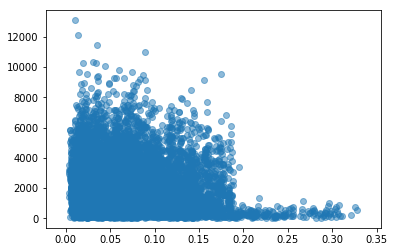

In [95]:
plt.scatter(dataConsolidated.Item_Visibility, dataConsolidated.Item_Outlet_Sales, alpha=.5);

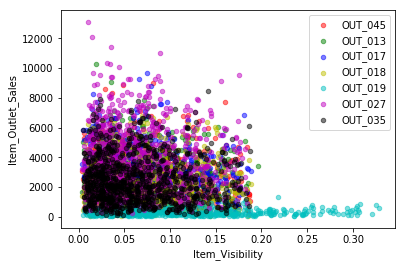

In [96]:
#plot for individual outlets marked by different colors
ax = dataConsolidated_OUT045.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='r', alpha=0.5, label='OUT_045')
dataConsolidated_OUT013.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='g', ax=ax, alpha=0.5, label='OUT_013')
dataConsolidated_OUT017.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='b', ax=ax, alpha=0.5, label='OUT_017')
dataConsolidated_OUT018.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='y', ax=ax, alpha=0.5, label='OUT_018')
dataConsolidated_OUT019.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='c', ax=ax, alpha=0.5, label='OUT_019')
dataConsolidated_OUT027.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='m', ax=ax, alpha=0.5, label='OUT_027')
dataConsolidated_OUT035.plot(kind='scatter', x = 'Item_Visibility', y = 'Item_Outlet_Sales', c='k', ax=ax, alpha=0.5, label='OUT_035')
plt.legend(loc='best');

# Correlation between item prices and sales

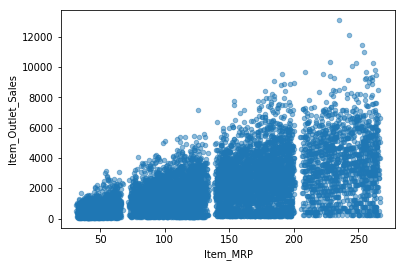

In [97]:
#scatter plot
dataConsolidated.plot(kind='scatter', x = 'Item_MRP', y = 'Item_Outlet_Sales', alpha=.5);

# Histograms

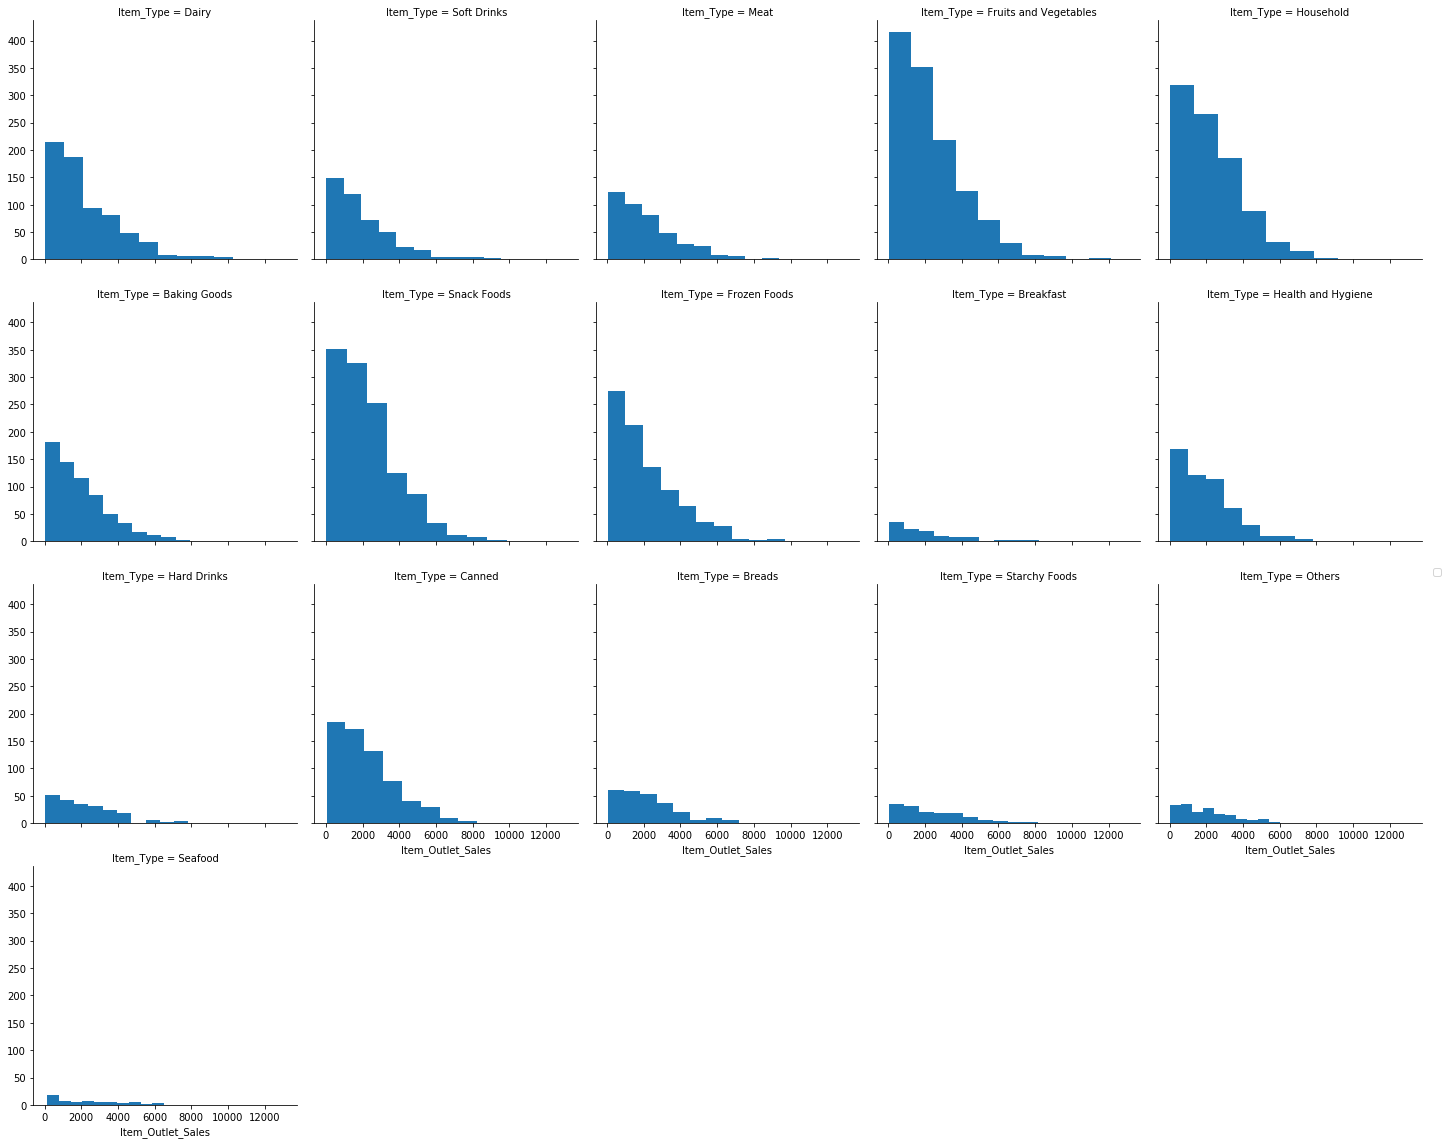

In [98]:
#histograms for Item type and Item Sales
sns.FacetGrid(dataConsolidated, col='Item_Type', size=4, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();

# Scatter Plots 

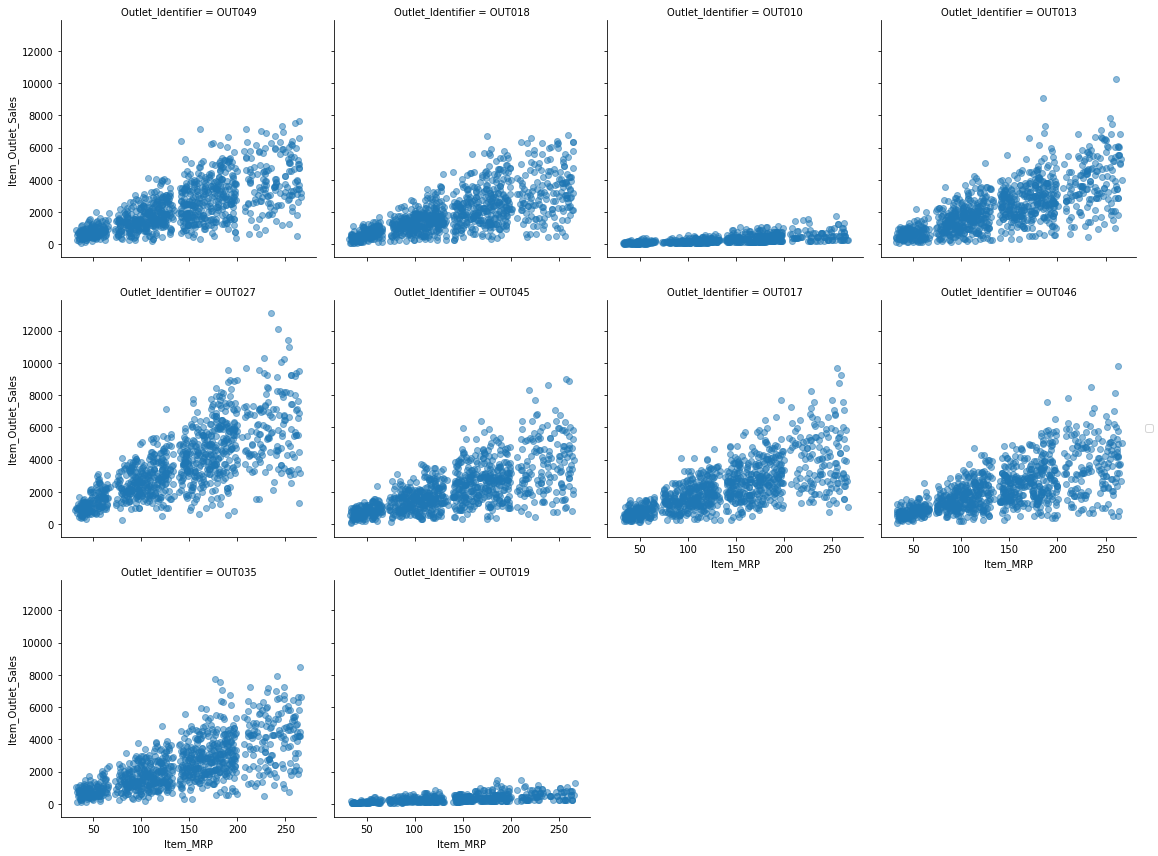

In [99]:
#for Outlet Sales at a particular Outlet based on MRP
sns.FacetGrid(dataConsolidated, col='Outlet_Identifier', col_wrap=4, size=4) \
    .map(plt.scatter, 'Item_MRP', 'Item_Outlet_Sales',  alpha=0.5) \
    .add_legend();

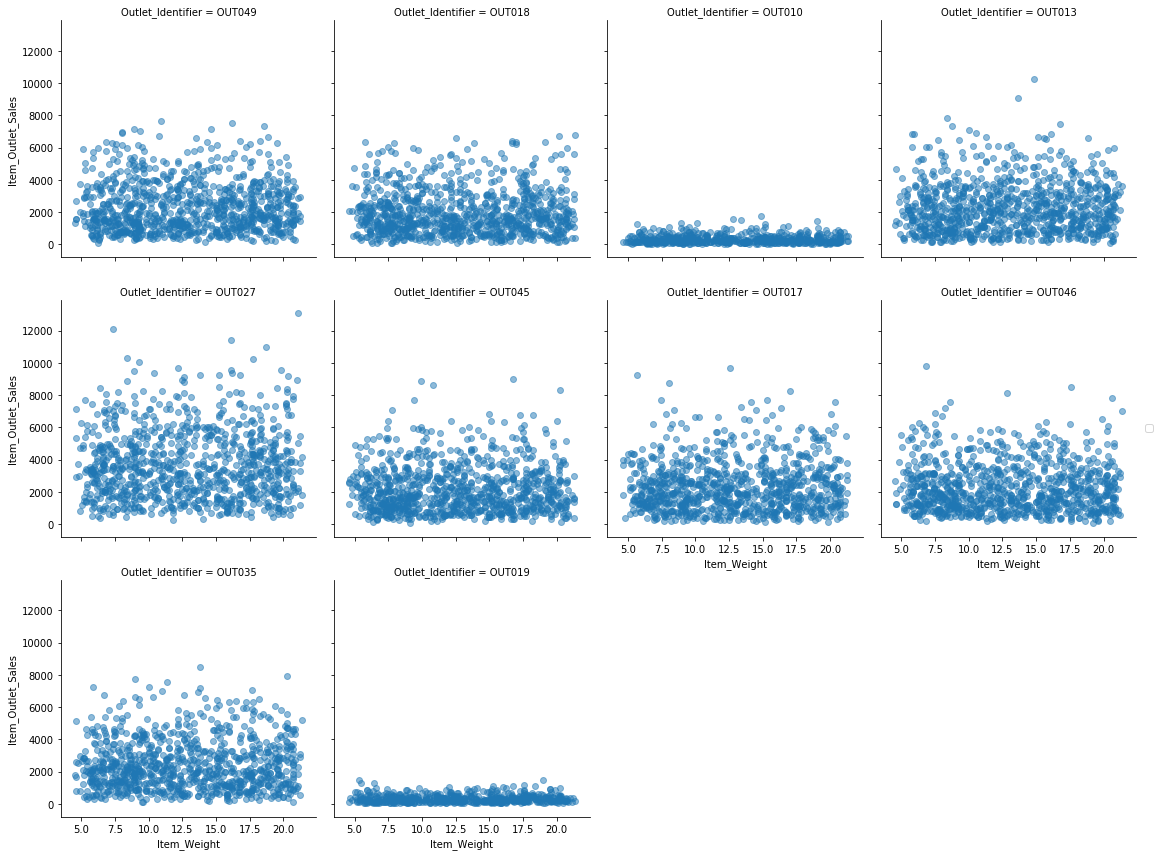

In [100]:
#Plot for Outlet sales at a particular outlet based on item weight  
sns.FacetGrid(dataConsolidated, col='Outlet_Identifier', col_wrap=4, size=4) \
    .map(plt.scatter, 'Item_Weight', 'Item_Outlet_Sales',  alpha=0.5) \
    .add_legend();

# Model Building

In [101]:
##drop the columns whose data types are converted.  Item type which is of
#16 categories has been reduced to 3 categories and instead of the establishment year
#we consider age of the stores for the analysis.

dataConsolidated = dataConsolidated.drop('Item_Type' , axis = 1)

In [102]:
dataConsolidated.head()


,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,sourceFile,Item_Visibility_MeanRatio,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,1999,OUT049,train,0.931078,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,2009,OUT018,train,0.933420,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,1999,OUT049,train,0.960069,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,1998,OUT010,train,1.000000,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,1987,OUT013,train,1.000000,26,...,0,1,0,0,0,0,0,0,0,0


In [103]:
#separating consolidated data into train and test
train=dataConsolidated.loc[dataConsolidated['sourceFile']=='train']
test=dataConsolidated.loc[dataConsolidated['sourceFile']=='test']
train.head
#Drop unnecessary columns
test.drop(['sourceFile','Item_Outlet_Sales'],axis=1,inplace=True)
train.drop(['sourceFile'],axis=1,inplace=True)

In [104]:
#we will create a baseline model that we will use further 
meanSales=train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for output
base1=test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales']=meanSales




In [105]:
base1['Item_Outlet_Sales']=base1['Outlet_Identifier'].apply(lambda x: train.loc[train['Outlet_Identifier']==x]
                                                            ['Item_Outlet_Sales'].mean())

In [106]:
#function to create output file
#define target and ID Columns for submission
target = 'Item_Outlet_Sales'
IDCol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics

# Linear Regression

In [107]:
# Linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor


%matplotlib inline

predictors = [x for x in train.columns if x not in [target]+IDCol]
#print predictors
regModel1= LinearRegression(normalize=True)

In [108]:
#fit the algorithm on the data
regModel1.fit(train[predictors],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [109]:
#predict training data set
train_predictions = regModel1.predict(train[predictors])

In [110]:
#performs cross validation
cv_score = cross_validation.cross_val_score(regModel1,train[predictors],train[target],cv=20,scoring='mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))

In [111]:
#Print model report
print ( "\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report :
RMSE : 1128
CV Score : Mean - 1130 | Std - 44.31 | Min - 1075 | Max - 1222


In [112]:
#Predict on testing data
test[target]=regModel1.predict(test[predictors])

# Ridge Regression

In [113]:
predictors = [x for x in train.columns if x not in [target]+IDCol]
alg2=Ridge(alpha=0.05,normalize=True)

#fit the algorithm on the data
alg2.fit(train[predictors],train[target])

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [114]:
#predict training data set
train_predictions = alg2.predict(train[predictors])

#Predict on testing data
test[target]=alg2.predict(test[predictors])

In [115]:
#performs cross validation
cv_score = cross_validation.cross_val_score(alg2,train[predictors],train[target],cv=20,scoring='mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
#Print model report
print ("\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions)))

print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))





Model Report :
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.63 | Min - 1076 | Max - 1217


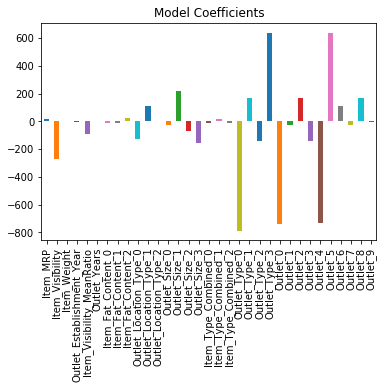

In [116]:
coef2 = pd.Series(alg2.coef_,predictors)
coef2.plot(kind='bar',title = 'Model Coefficients')

# AdaBooster Regressor 

In [117]:
ada1=AdaBoostRegressor(base_estimator=regModel1,learning_rate=0.9)
#fit the algorithm on the data
ada1.fit(train[predictors],train[target])


AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),
         learning_rate=0.9, loss='linear', n_estimators=50,
         random_state=None)

In [118]:
#predict training data set
train_predictions = ada1.predict(train[predictors])

#Predict on testing data
test[target]=ada1.predict(test[predictors])

In [119]:
cv_score = cross_validation.cross_val_score(ada1,train[predictors],train[target],cv=20,scoring='mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
#Print model report
print ("\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report :
RMSE : 1153
CV Score : Mean - 1156 | Std - 43.32 | Min - 1079 | Max - 1239


# Decison Tree Model

In [120]:
#DecisionTree Model
from sklearn.tree import DecisionTreeRegressor
predictors=[x for x in train.columns if x not in [target]+IDCol]
regModel3=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
ada2=AdaBoostRegressor(base_estimator=regModel3)#,learning_rate=0.9)


ada2.fit(train[predictors],train[target])

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [121]:
regModel3=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
regModel3.fit(train[predictors],train[target])

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

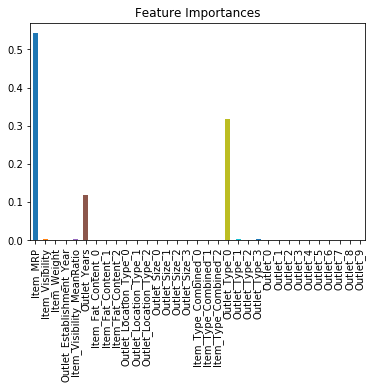

In [122]:
coef5=pd.Series(regModel3.feature_importances_,predictors)
coef5.plot(kind='bar',title='Feature Importances')

In [123]:
cv_score = cross_validation.cross_val_score(ada2,train[predictors],train[target],cv=20,scoring='mean_squared_error')
cv_score=np.sqrt(np.abs(cv_score))
#Print model report
print ("\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report :
RMSE : 1153
CV Score : Mean - 1254 | Std - 43.8 | Min - 1180 | Max - 1331


# RandomForest Regressor 


Model Report :
RMSE : 1153
CV Score : Mean - 1254 | Std - 43.8 | Min - 1180 | Max - 1331


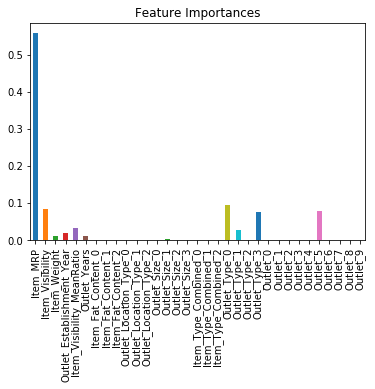

In [124]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
predictors=[x for x in train.columns if x not in [target]+IDCol]
regModel5=RandomForestRegressor(n_estimators=200,max_depth=3,min_samples_leaf=300,n_jobs=4)
ada2=AdaBoostRegressor(base_estimator=regModel5)#,learning_rate=0.9)
#fit the algorithm on the data
ada2.fit(train[predictors],train[target])
coef5=pd.Series(ada2.feature_importances_,predictors)
coef5.plot(kind='bar',title='Feature Importances')
#Print model report
print ("\nModel Report :")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values,train_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
  

In [126]:
#Export submission file
filename= "outputFile3.csv"
IDCol.append(target)
submission = pd.DataFrame({x : test[x] for x in IDCol})
submission.to_csv("C:\\Users\\mythr\\OneDrive\\Documents\\Mythri G\\GSU\\coursework\\data programming\\BigMart\\big-mart-sales-prediction\\"+'outputFilefinal.csv',index=False)